In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import torch


In [2]:
train_df = pd.read_csv("./data/pointcloudmnist2d/train.csv")
test_df = pd.read_csv("./data/pointcloudmnist2d/test.csv")

In [3]:
train_df.head()

,label,x0,y0,v0,x1,y1,v1,x2,y2,v2,...,v347,x348,y348,v348,x349,y349,v349,x350,y350,v350
0,5,17,10,249,16,6,81,13,14,241,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,0,22,17,50,8,8,225,22,15,195,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,4,8,12,207,10,11,98,19,20,2,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,1,8,6,48,11,8,251,14,13,251,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,9,17,15,253,16,4,56,9,14,176,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [4]:
y_train = np.array(train_df['label']).reshape(-1,1)
y_test = np.array(test_df['label']).reshape(-1,1)

y_train.shape

(60000, 1)

In [5]:
X_train = np.array(train_df.drop(["label"],axis=1))
X_test = np.array(test_df.drop(["label"],axis=1))

# X_train = np.array(train_df.loc[:, 'x0':'v350'])
# X_test = np.array(test_df.loc[:, 'x0':'v350'])


In [6]:
X_train

array([[ 17,  10, 249, ...,  -1,  -1,  -1],
       [ 22,  17,  50, ...,  -1,  -1,  -1],
       [  8,  12, 207, ...,  -1,  -1,  -1],
       ...,
       [ 14,  13, 253, ...,  -1,  -1,  -1],
       [ 10,  14, 253, ...,  -1,  -1,  -1],
       [  7,   6, 254, ...,  -1,  -1,  -1]])

In [7]:
# demo = X_train.iloc[0]
 X_train[0]

array([ 17,  10, 249, ...,  -1,  -1,  -1])

/Users/Tommy/opt/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


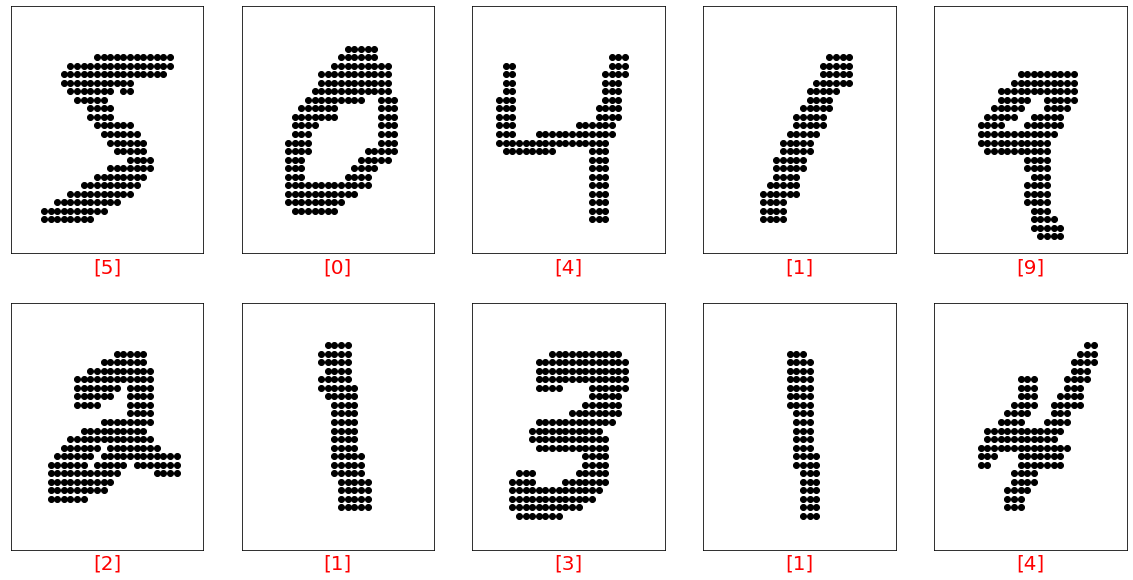

In [8]:
#visualize the first 10 training images 
i, x, y = 0, 0, 0

plt.figure(figsize=(20,10))
for num_fig in range(10):
    plt.subplot(2, 5, num_fig+1)
    plt.xticks([])
    plt.yticks([])
    plt.xlim(-1, 28)
    plt.ylim(-1, 28)
    plt.xlabel(y_train[num_fig], size=20, color='red')
    i = 0
    for val in X_train[num_fig]:
        if val != -1:
            if i % 3 == 0:
                x = val
            if i % 3 == 1:
                y = val
            if i % 3 == 2:
                plt.scatter(x, y, color='black')
                #print(i)
        #print(val)
       
        i += 1


In [9]:
def restore_image_array(X_array, resolution):
    num_samples = len(X_array)
    #print(num_samples)
    X_img = np.zeros((num_samples, resolution, resolution))
    
    x, y, pixel = 0, 0, 0
    
    for seq in range(num_samples):
        i = 0
        for val in X_array[seq]:
            if val != -1:
                if i % 3 == 0:
                    x = val
                if i % 3 == 1:
                    y = val
                if i % 3 == 2:
                    pixel = val
                    X_img[seq][27-y][x] = pixel
                 
            i += 1
    
    return X_img
    

In [10]:
X_img_train = restore_image_array(X_train, 28)
X_img_train.shape
X_img_test = restore_image_array(X_test, 28)
X_img_test.shape

(10000, 28, 28)

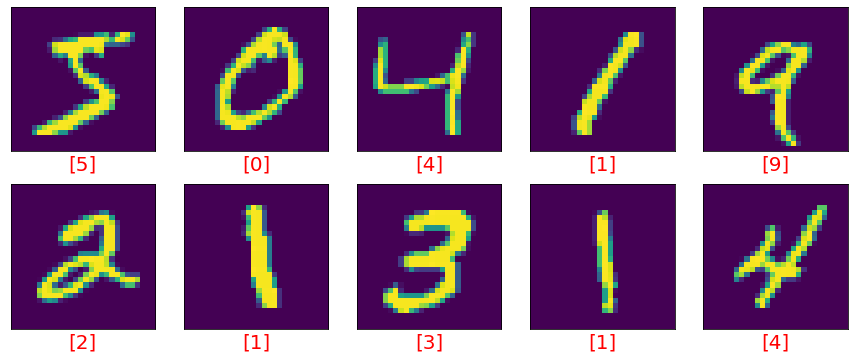

In [11]:
#visualize the first 10 image after restore as image format
plt.figure(figsize=(15,6))
for num_fig in range(10):
    plt.subplot(2, 5, num_fig+1)
    plt.imshow(X_img_train[num_fig])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(y_train[num_fig], size=20, color='red')

In [12]:
# reduce the dim of the array
X_flatten_train = X_img_train.reshape(len(X_img_train), -1)
X_flatten_test = X_img_test.reshape(len(X_img_test), -1)
print(X_flatten_train.shape)
print(X_flatten_test.shape)

(60000, 784)
(10000, 784)


In [13]:
X_train,y_train,X_test,y_test=map(
    torch.tensor,(X_flatten_train,y_train,X_flatten_test,y_test)
)
n,c=X_train.shape


In [14]:
X_train=torch.tensor(X_flatten_train,dtype=torch.float32)

In [15]:
import torch.nn.functional as F 

loss_func= F.cross_entropy

def model(xb):
    return xb.mm(weights)+bias

In [16]:
bs = 64
xb=X_train[0:bs]
yb=y_train[0:bs]
weights=torch.randn([784,10],dtype=torch.float32,requires_grad=True)
bias=torch.zeros(10,requires_grad=True)
print(loss_func(model(xb),yb))


RuntimeError: 1D target tensor expected, multi-target not supported

In [ ]:
from torch import nn

class Mnist_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1=nn.Linear(784,128)
        self.hidden2=nn.Linear(128,256)
        self.out =nn.Linear(256,10)
        
    def forward(self,x):
        x=F.relu(self.hidden1(x))
        x=F.relu(self.hidden2(x))
        x=self.out(x)
        return x

In [ ]:
net=Mnist_NN()
print(net)

In [ ]:
for name, parameter in net.named_parameters():
    print(name,parameter.size())
    print(parameter)

In [ ]:
# loader

In [ ]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [ ]:
X_train=torch.tensor(X_flatten_train,dtype=torch.float32)
X_test=torch.tensor(X_flatten_test,dtype=torch.float32)

In [ ]:
X_flatten_train

In [ ]:
X_train

In [ ]:
train_ds=TensorDataset(X_train,y_train)
train_dl=DataLoader(train_ds,batch_size=bs,shuffle=True)

test_ds=TensorDataset(X_test,y_test)
test_dl=DataLoader(test_ds,batch_size=bs*2,shuffle=True)


In [ ]:
def get_data(train_ds,test_ds,bs):
    return (DataLoader(train_ds,batch_size=bs,shuffle=True),
           DataLoader(test_ds,batch_size=bs*2))

In [ ]:
def loss_batch(model,loss_func,xb,yb,opt=None):
    loss=loss_func(model(xb),yb)
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()
        
    return loss.item(),len(xb)

In [ ]:
def fit(steps,model,loss_func,opt,ttrain_dl,test_dl):
    for step in range(steps):
        model.train()
        for xb,yb in train_dl:
            loss_batch(model,loss_func,xb,yb,opt)
            
        model.eval()
        with torch.no_grad():
            losses,nums=zip(
            *[loss_batch(model,loss_func,xb,yb) for xb,yb in valid_dl]
            )
        val_loss=np.sum(np.multiply(losses,nums))/np.sum(nums)
        print(step,val_loss)

In [ ]:
from torch import optim

def get_model():
    model=Mnist_NN()
    return model,optim.SGD(model.parameters(),lr=0.001)

In [ ]:
train_dl,test_dl=get_data(train_ds,test_ds,bs)
model,opt=get_model()
fit(25,model,loss_func,opt,train_dl,test_dl)